<a href="https://colab.research.google.com/github/2303a51603/Reinforcement-learning-/blob/main/Lab%20Ass%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Policy evaluation converged in 9 iterations.

Value Function V(s):
[[ -0.43   0.63   1.81   3.12   4.58]
 [  0.63   1.81   3.12   4.58   6.2 ]
 [-10.   -10.     0.     6.2    8.  ]
 [  3.12   4.58   6.2    8.    10.  ]
 [  4.58   6.2    8.    10.     0.  ]]


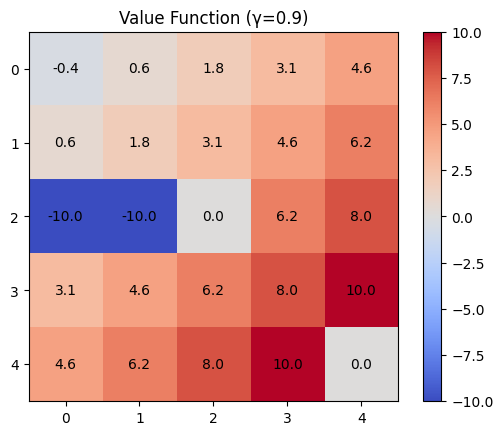

Policy evaluation converged in 9 iterations.


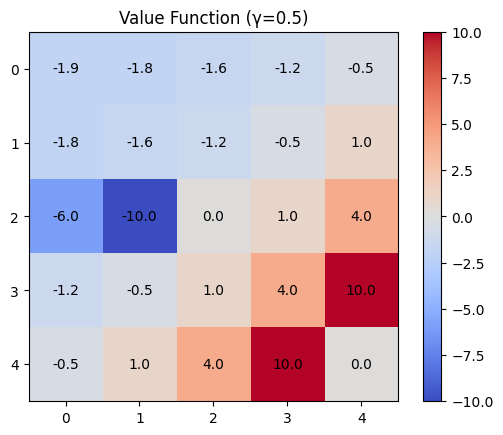

Policy evaluation converged in 9 iterations.


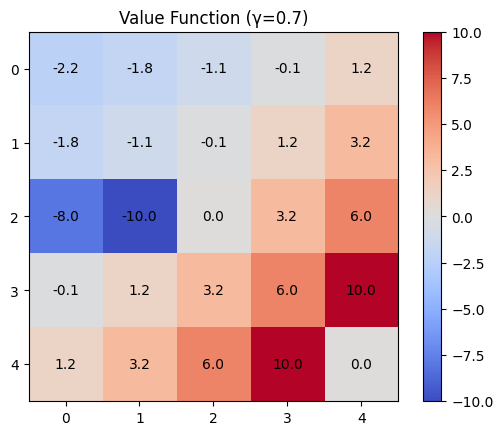

Policy evaluation converged in 9 iterations.


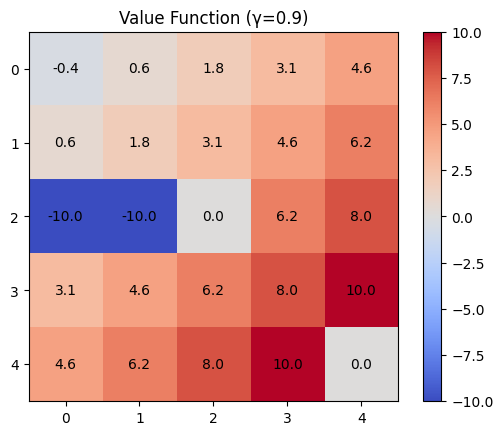

Policy evaluation converged in 9 iterations.


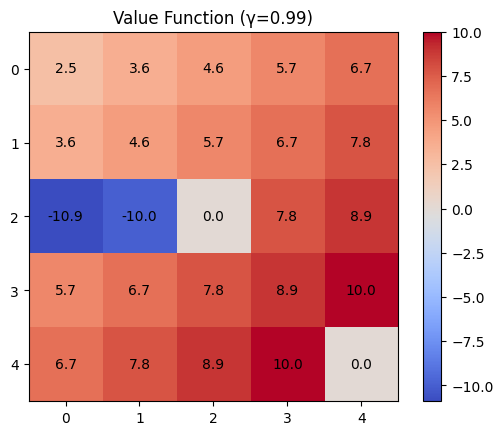

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# GridWorld parameters
N = 5  # Grid size
gamma = 0.9  # Discount factor

# Rewards
goal = (4, 4)
pit = (2, 2)
reward_grid = -1 * np.ones((N, N))
reward_grid[goal] = 10
reward_grid[pit] = -10

# Actions: (delta_x, delta_y)
actions = {
    "right": (0, 1),
    "down": (1, 0)
}

# Fixed policy: Right if possible, else Down
def policy(state):
    x, y = state
    if y < N - 1:
        return "right"
    elif x < N - 1:
        return "down"
    else:
        return None  # No movement if at bottom-right

# Check if state is terminal
def is_terminal(state):
    return state == goal or state == pit

# Compute next state and reward
def step(state, action):
    if action is None or is_terminal(state):
        return state, 0  # no reward for terminal state

    dx, dy = actions[action]
    new_x = min(max(state[0] + dx, 0), N - 1)
    new_y = min(max(state[1] + dy, 0), N - 1)
    next_state = (new_x, new_y)
    reward = reward_grid[next_state]
    return next_state, reward

# Value Iteration for policy evaluation
def evaluate_policy(gamma=0.9, theta=1e-4):
    V = np.zeros((N, N))
    iteration = 0
    while True:
        delta = 0
        new_V = np.copy(V)
        for x in range(N):
            for y in range(N):
                state = (x, y)
                if is_terminal(state):
                    continue
                a = policy(state)
                next_state, reward = step(state, a)
                new_V[state] = reward + gamma * V[next_state]
                delta = max(delta, abs(V[state] - new_V[state]))
        V = new_V
        iteration += 1
        if delta < theta:
            break
    print(f"Policy evaluation converged in {iteration} iterations.")
    return V

# Plotting function
def plot_value_function(V, gamma):
    fig, ax = plt.subplots()
    im = ax.imshow(V, cmap='coolwarm', origin='upper')

    for i in range(N):
        for j in range(N):
            ax.text(j, i, f"{V[i,j]:.1f}", ha="center", va="center", color="black")

    plt.title(f"Value Function (γ={gamma})")
    plt.colorbar(im)
    plt.show()

# Main evaluation
if __name__ == "__main__":
    V = evaluate_policy(gamma=gamma)
    print("\nValue Function V(s):")
    print(np.round(V, 2))
    plot_value_function(V, gamma)

    # Optional: Analyze effect of different gamma values
    for g in [0.5, 0.7, 0.9, 0.99]:
        V_temp = evaluate_policy(gamma=g)
        plot_value_function(V_temp, gamma=g)
